In [1]:
%matplotlib inline

from sympy import *
from sympy.geometry import *
import matplotlib.pyplot as plt
import matplotlib.lines as mpl_lines
from matplotlib.path import Path
import matplotlib.patches as patches

init_printing()

import math
import numpy

xlim = (-0.75,0.75)
ylim = (-0.75,0.75)

def slope_from_points(point1, point2):
    return (point2.y - point1.y)/(point2.x - point1.x)

def get_xlim_value(point1, point2):
    # plot the secant
    slope = slope_from_points(point1, point2)
    intercept = point1.y - slope*point1.x
    # update the points to be on the axes limits
    if point1.x == point2.x:
        data_x = (point1.x, point1.x)
        data_y = ylim
    else:
        data_x = xlim
        data_y = (xlim[0]*slope+intercept, ylim[1]*slope+intercept)
    return data_x, data_y

try:
    currentobjs = currentobjs
except NameError:
    currentobjs = []

def plot(obj, selected, name=""):
    if type(obj) == Point2D:
        if selected == False:
            plt.plot(obj.x, obj.y, 'ro')
        else:
            plt.plot(obj.x, obj.y, 'o', color="orange")
        plt.annotate(name, (obj.x,obj.y), fontsize=16, color=(0.5,0.1,0.1))
    if type(obj) == Segment:
        # plt.axes().add_line(mpl_lines.Line2D((obj.p1.x, obj.p2.x), (obj.p1.y, obj.p2.y)))
        if selected == False:
            plt.plot([obj.p1.x, obj.p2.x], [obj.p1.y, obj.p2.y], 'b-')
        else:
            plt.plot([obj.p1.x, obj.p2.x], [obj.p1.y, obj.p2.y], '-', color="orange", linewidth=2)
    if type(obj) == Line:
        coor = get_xlim_value(obj.p1,obj.p2)
        if selected == False:
            plt.plot(coor[0], coor[1], 'b-')
        else:
            plt.plot(coor[0], coor[1], '-', color="orange", linewidth=2)
    if type(obj) == Polygon or type(obj) == Triangle:
        verts = []
        codes = []
        
        for k,v in enumerate(obj.vertices):
            verts.append((v.x, v.y))
            if k == 0:
                codes.append(Path.MOVETO)
            else:
                codes.append(Path.LINETO)
        verts.append((obj.vertices[0].x, obj.vertices[0].y))
        codes.append(Path.CLOSEPOLY)
        
        path = Path(verts, codes)
        if selected == False:
            patch = patches.PathPatch(path, facecolor=(0,1,0.5,0.5), edgecolor="none", lw=1)
        else:
            patch = patches.PathPatch(path, facecolor=(1,0.5,0,0.5), edgecolor="none", lw=2)
        plt.gca().add_patch(patch)

def draw(*objs, add_currentobjs=True, sizex=16, sizey=None, colcount=2, rowcount=None):
    
    if rowcount == None:
        rowcount = math.ceil(len(objs) / colcount)
    
    if sizey == None:
        sizey = len(objs)*sizex/colcount/colcount
    
    plt.figure(figsize=(sizex,sizey))
    for index, obj in enumerate(objs):
        plt.subplot(rowcount, colcount, index+1)
        
        plt.gca().set_xlim(xlim)
        plt.gca().set_ylim(ylim)
        plt.gca().set_aspect('equal')
        
        for currentobj in currentobjs:
            plot(currentobj["obj"], False, name=currentobj.get("name", ""))
        plot(obj["obj"], True, name=obj.get("name", ""))
        
        if add_currentobjs:
            currentobjs.append(obj)
            plt.title(str(len(currentobjs)))
    
    plt.show()

1 - A(-0.5,0.5)をとる

2 - B(-0.5,-0.5)をとる

3 - C(0.5,-0.5)をとる

4 - D(0.5,0.5)をとる

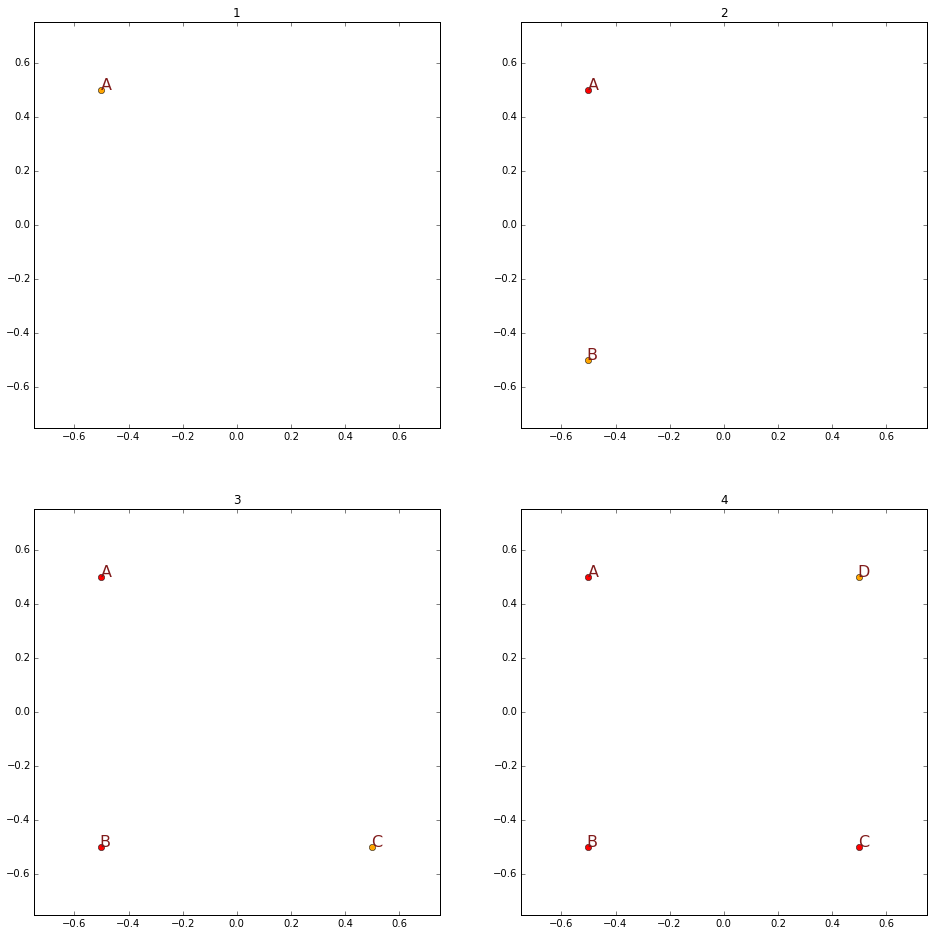

In [2]:
currentobjs = []

xlim = (-0.75,0.75)
ylim = (-0.75,0.75)

A = Point2D(-0.5,0.5) # 1
B = Point2D(-0.5,-0.5) # 2
C = Point2D(0.5,-0.5) # 3
D = Point2D(0.5,0.5) # 4
draw({"obj": A, "name": "A"}, {"obj": B, "name": "B"}, {"obj": C, "name": "C"}, {"obj": D, "name": "D"})

5 - AからBへ線分lを引く

6 - BからCへ線分mを引く

7 - CからDへ線分nを引く

8 - DからAへ線分oを引く

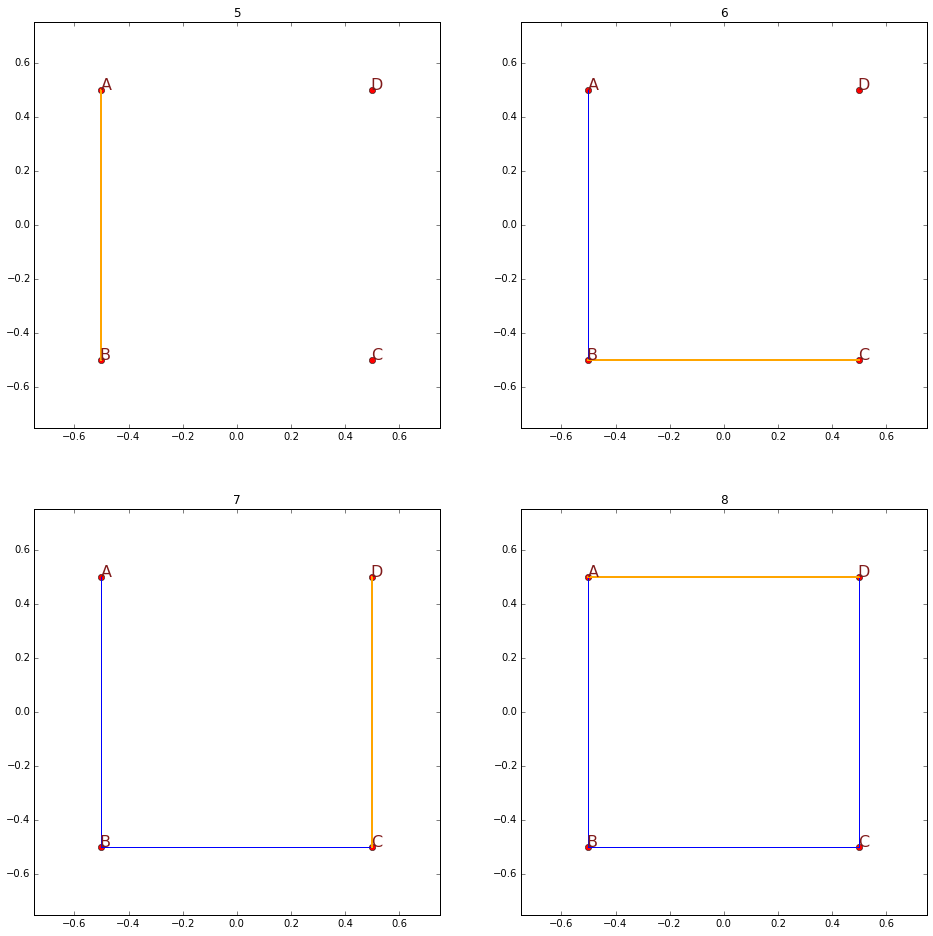

In [3]:
l = Segment(A, B) # 5
m = Segment(B, C) # 6
n = Segment(C, D) # 7
o = Segment(D, A) # 8
draw({"obj": l, "name": "l"}, {"obj": m, "name": "m"}, {"obj": n, "name": "n"}, {"obj": o, "name": "o"})

9 - 線分oを垂直に2等分する直線pを引く

10 - 線分lを垂直に2等分する直線qを引く

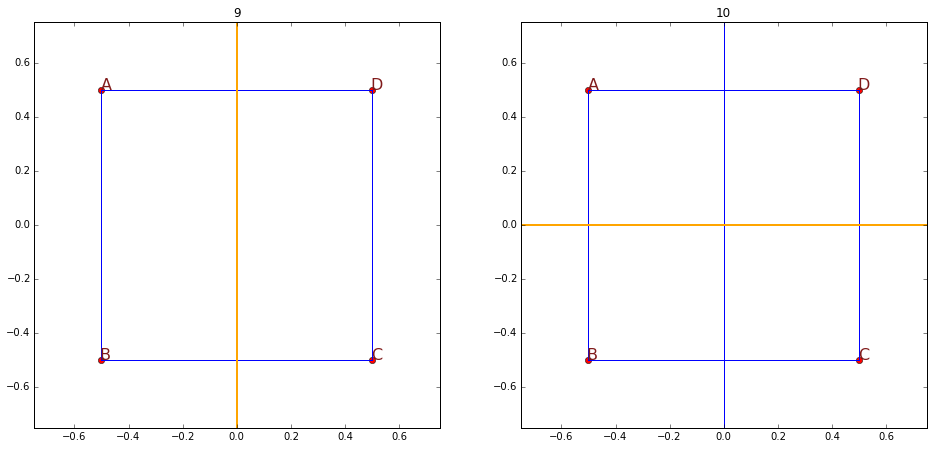

In [4]:
p = o.perpendicular_bisector() # 9
q = l.perpendicular_bisector() # 10
draw({"obj": p, "name": "p"}, {"obj": q, "name": "q"})

11 - oとpの交点Eをとる

12 - pとqの交点Fをとる

13 - qとnの交点Gをとる

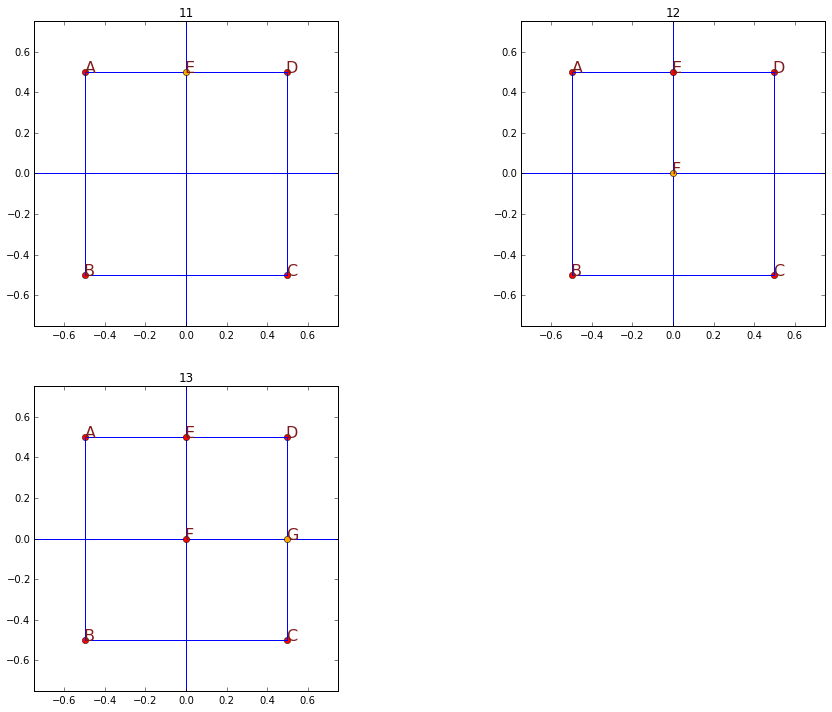

In [5]:
E = intersection(o, p)[0] # 11
F = intersection(p, q)[0] # 12
G = intersection(q, n)[0] # 13

draw({"obj": E, "name": "E"}, {"obj": F, "name": "F"}, {"obj": G, "name": "G"})

14 - ∠EFDを2等分する直線rを引く

15 - ∠EFGを2等分する直線sを引く

16 - ∠DFGを2等分する直線tを引く

17 - EからGへ線分uを引く

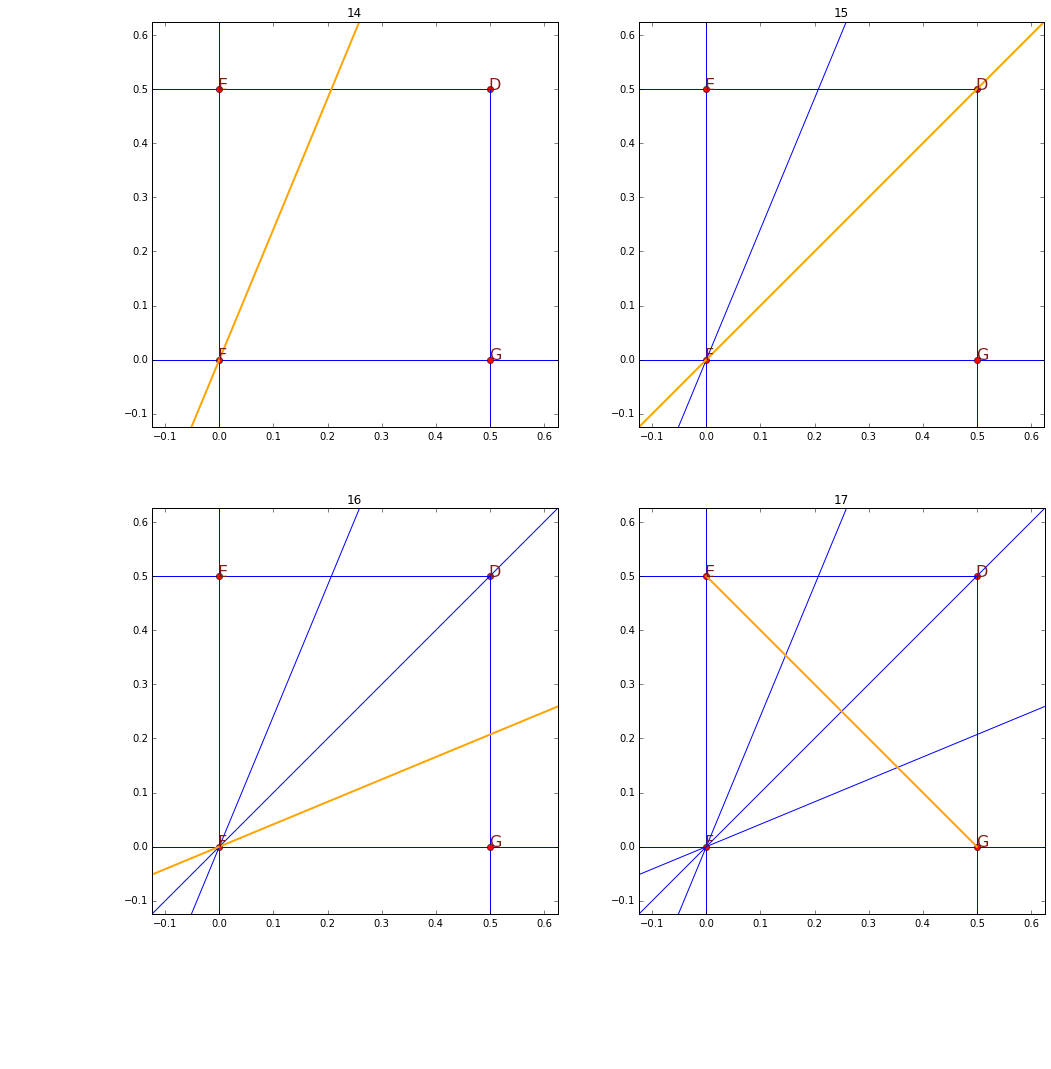

In [6]:
xlim = (-0.125,0.625)
ylim = (-0.125,0.625)

r = Line(F, Triangle(E, F, D).incenter) # 14
s = Line(F, Triangle(E, F, G).incenter) # 15
t = Line(F, Triangle(D, F, G).incenter) # 16
u = Segment(E, G) # 17
draw({"obj": r, "name": "r"}, {"obj": s, "name": "s"}, {"obj": t, "name": "t"}, {"obj": u, "name": "u"})

18 - rとuの交点Hをとる

19 - sとuの交点Iをとる

20 - tとuの交点Jをとる

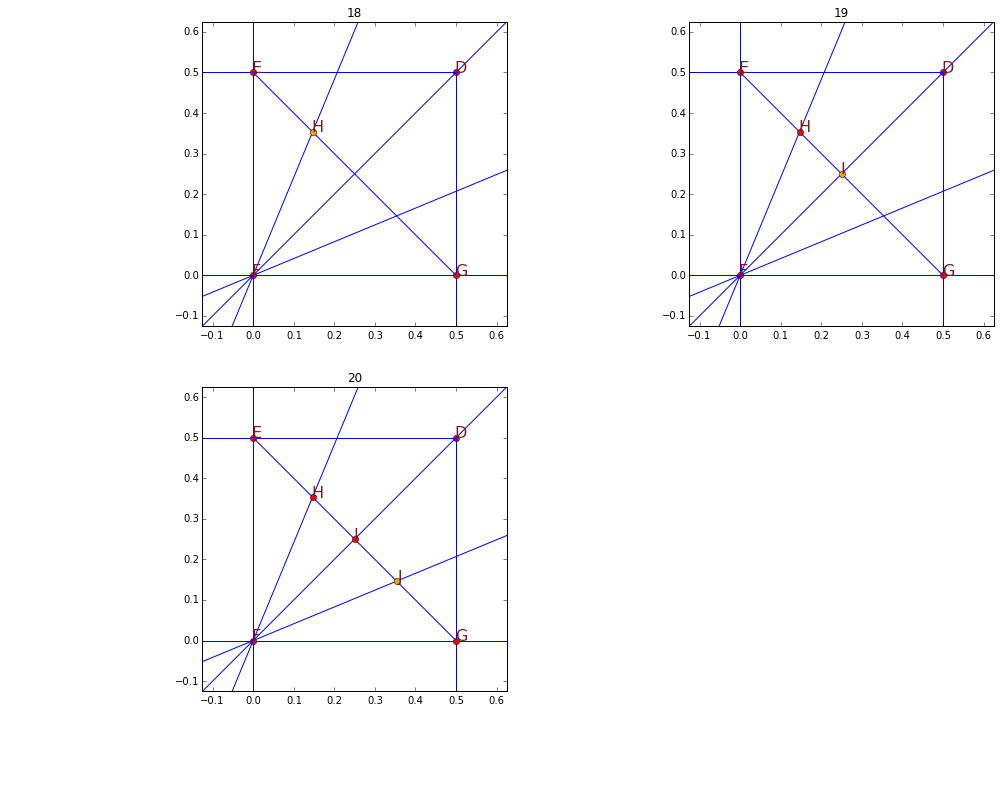

In [7]:
H = intersection(r, u)[0] # 18
I = intersection(s, u)[0] # 19
J = intersection(t, u)[0] # 20
draw({"obj": H, "name": "H"}, {"obj": I, "name": "I"}, {"obj": J, "name": "J"})

21 - HからDへ線分vを引く

22 - JからDへ線分wを引く

23 - Hを通りoに垂直な直線xを引く

24 - Jを通りnに垂直な直線yを引く

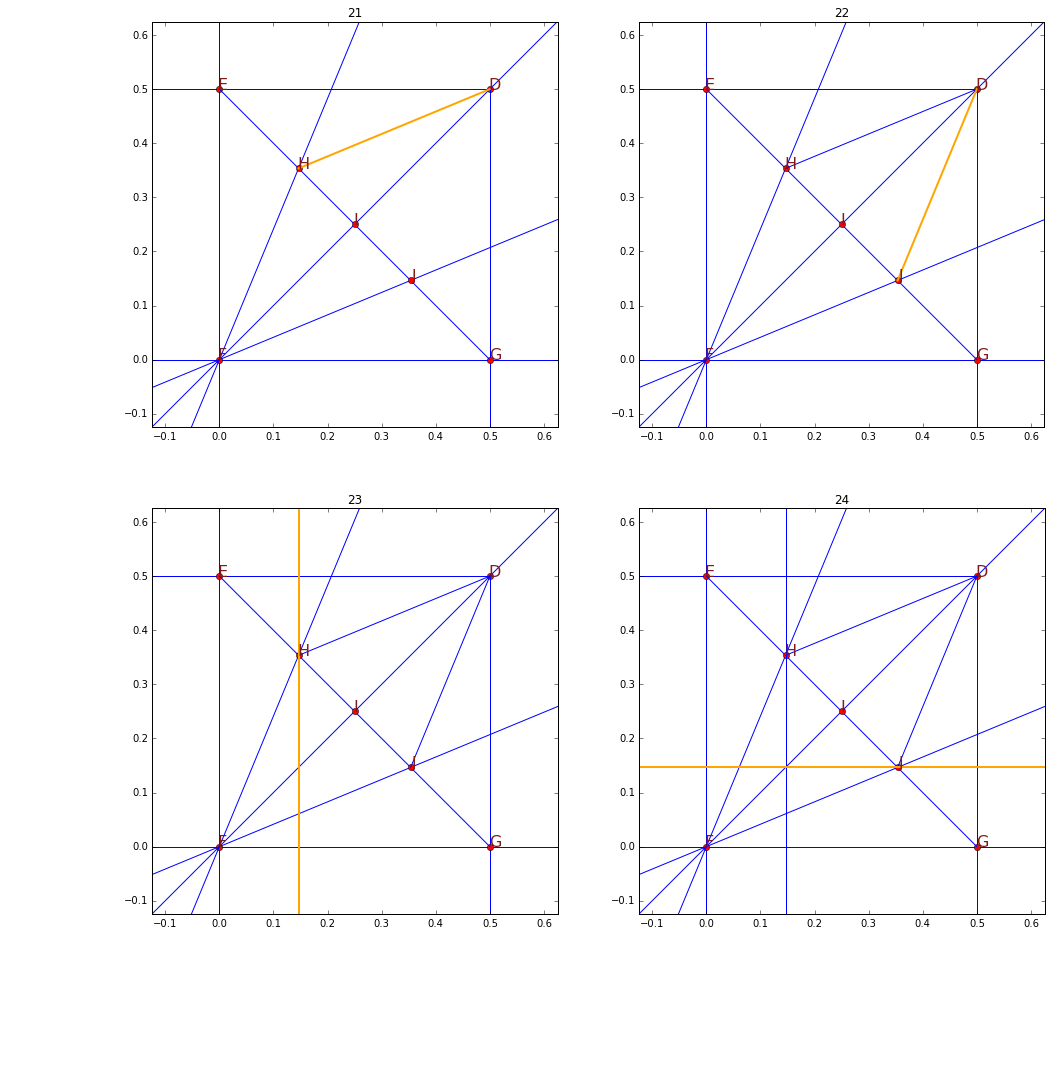

In [8]:
v = Segment(H,D) # 21
w = Segment(J,D) # 22
x = o.perpendicular_line(H) # 23
y = n.perpendicular_line(J) # 24
draw({"obj": v, "name": "v"}, {"obj": w, "name": "w"}, {"obj": x, "name": "x"}, {"obj": y, "name": "y"})

25 - oとxの交点Kをとる

26 - nとyの交点Lをとる

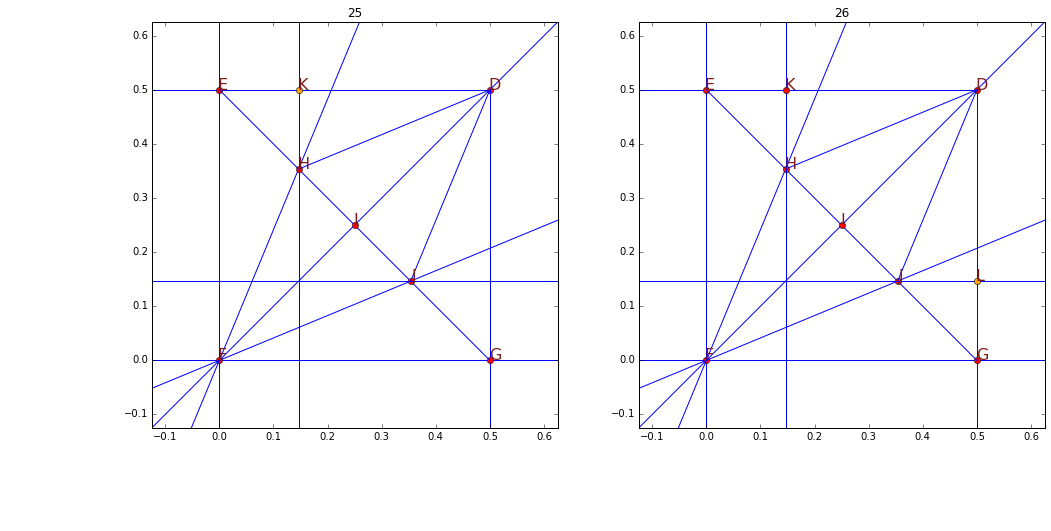

In [9]:
K = intersection(o,x)[0] # 25
L = intersection(n,y)[0] # 26
draw({"obj": K, "name": "K"}, {"obj": L, "name": "L"})

27 - ∠KHDを2等分する直線p2を引く

28 - ∠LJDを2等分する直線q2を引く

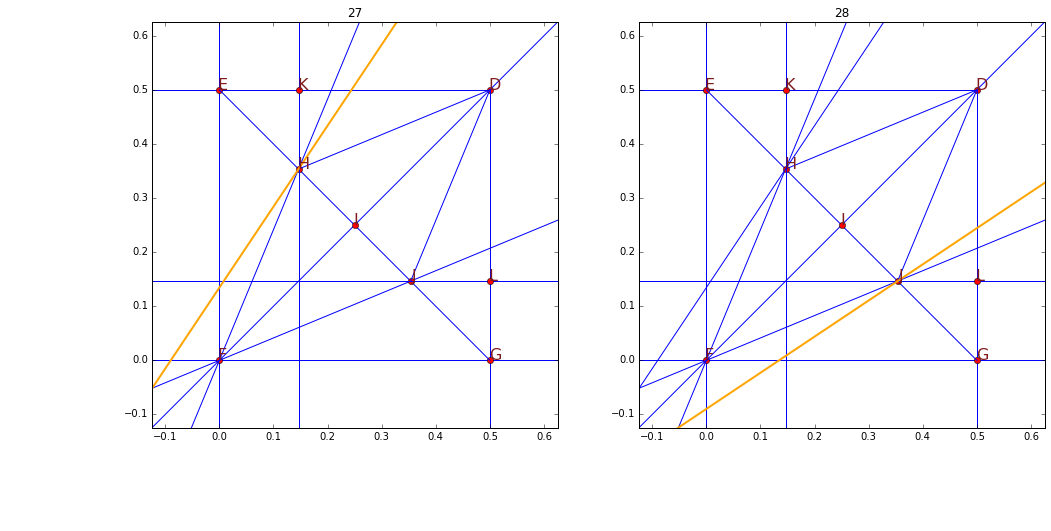

In [10]:
p2 = Line(H, Triangle(K, H, D).incenter) # 27
q2 = Line(J, Triangle(L, J, D).incenter) # 28
draw({"obj": p2, "name": "p2"}, {"obj": q2, "name": "q2"})

29 - oとp2の交点E2をとる

30 - q2とnの交点G2をとる

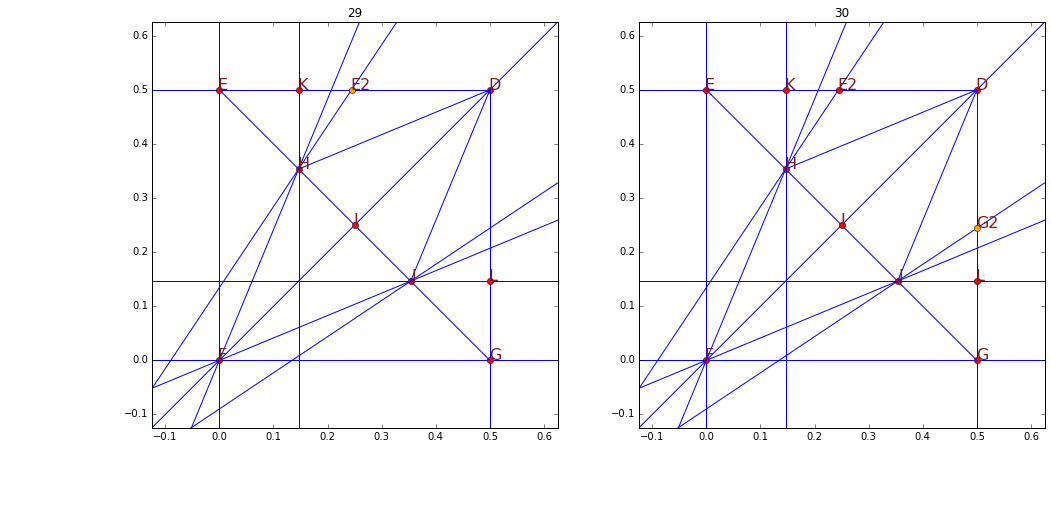

In [11]:
E2 = intersection(o, p2)[0] # 29
G2 = intersection(q2, n)[0] # 30
draw({"obj": E2, "name": "E2"}, {"obj": G2, "name": "G2"})

31 - ∠(J)(E2)(D)を二等分する直線u2Aを引く

32 - ∠(H)(G2)(D)を二等分する直線u2Cを引く

33 - u2Aとvの交点H2をとる

34 - u2Cとwの交点J2をとる

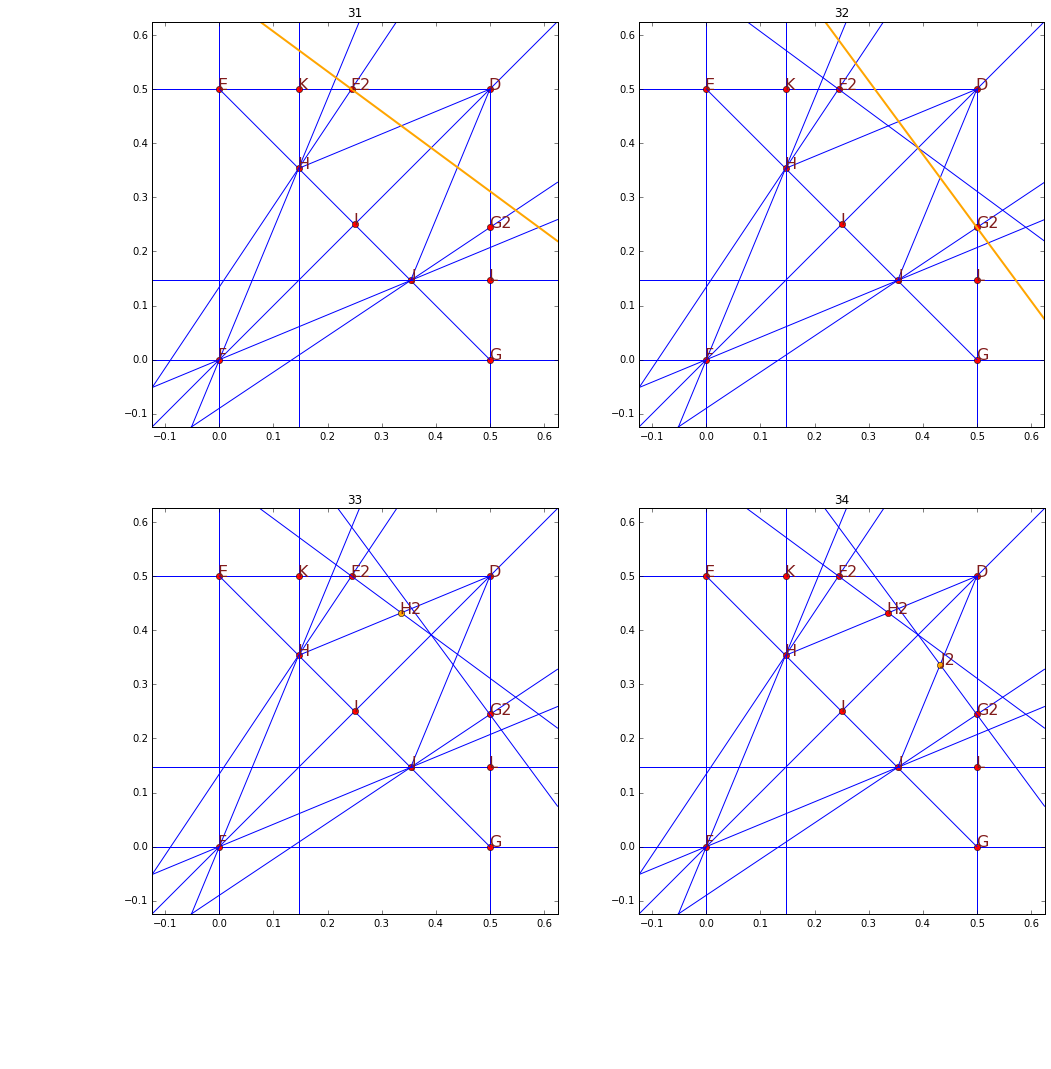

In [12]:
u2A = Line(E2, Triangle(J, E2, D).incenter) # 31
u2C = Line(G2, Triangle(H, G2, D).incenter) # 32

H2 = intersection(u2A,Line(v))[0] # 33
J2 = intersection(u2C,Line(w))[0] # 34

draw({"obj": u2A, "name": "u2A"}, {"obj": u2C, "name": "u2C"}, {"obj": H2, "name": "H2"}, {"obj": J2, "name": "J2"})

35 - oに垂直でH2を通る直線x2を引く

36 - nに垂直でJ2を通る直線y2を引く

37 - oとx2の交点K2をとる

38 - nとy2の交点L2をとる

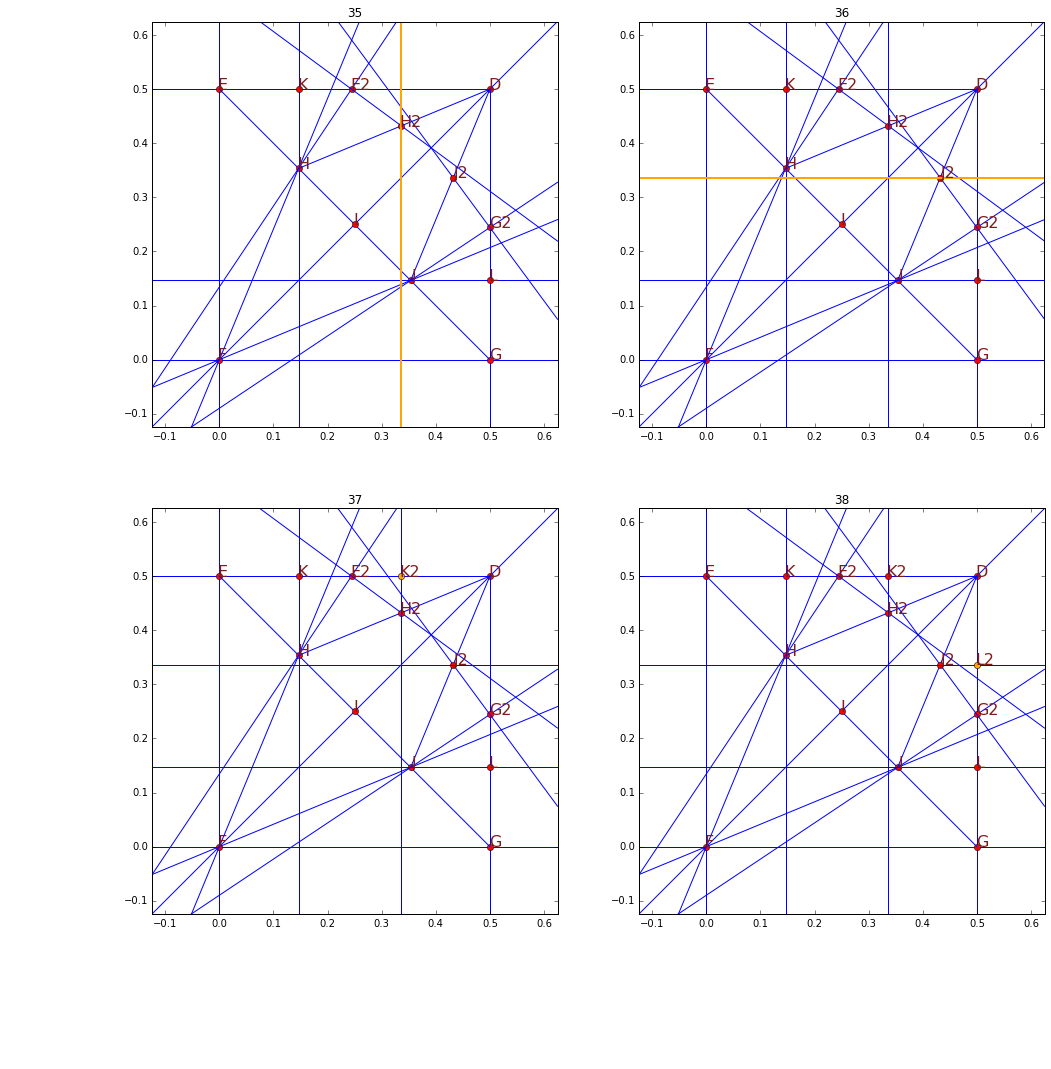

In [13]:
x2 = o.perpendicular_line(H2) # 35
y2 = n.perpendicular_line(J2) # 36

K2 = intersection(Line(o),x2)[0] # 37
L2 = intersection(Line(n),y2)[0] # 38

draw({"obj": x2, "name": "x2"}, {"obj": y2, "name": "y2"}, {"obj": K2, "name": "K2"}, {"obj": L2, "name": "L2"})